## Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 ## You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
dataset = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [6]:
dataset.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
dataset['Sex'].value_counts(1)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

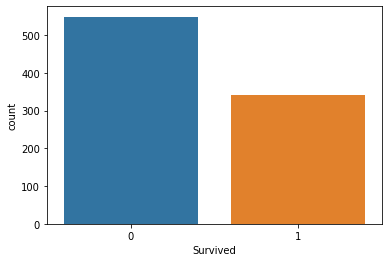

In [8]:
sns.countplot(dataset['Survived'])

In [9]:
dataset['Sex'] = dataset['Sex'] .replace(("male", "female"),(0,1))

In [10]:
dataset.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [11]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [12]:
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

## Co-relation

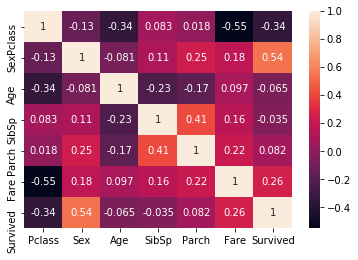

In [13]:
sns.heatmap(dataset.corr(),annot=True)

In [14]:
X = dataset.drop("Survived",axis=1)
y = dataset['Survived']

In [15]:
X.shape,y.shape

((891, 6), (891,))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35, random_state = 41)

In [17]:
# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x test1 :", X_test.shape)
print("Shape of the y test1 :", y_test.shape)

Shape of the x Train : (579, 6)
Shape of the y Train : (579,)
Shape of the x test1 : (312, 6)
Shape of the y test1 : (312,)


## Decision Tree

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.8359240069084629
Testing Accuracy : 0.8365384615384616


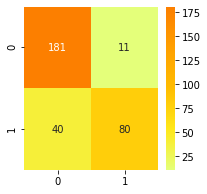

In [19]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=30, max_leaf_nodes=10)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [20]:
prediction = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original","predict"])
prediction.head(25)

,Original,predict
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1
